# Study on HateXplain

In [10]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import os
from os import path

import sys
sys.path.append("./../src")

cache_path = path.join(os.getcwd(), '..', '.cache')
dataset_path = path.join(cache_path, 'dataset')
tmp_path = path.join('.cache', '2022-07-27')
os.makedirs(tmp_path,exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from datasets import load_dataset
import shutil

dataset = load_dataset("hatexplain", cache_dir=path.join(cache_path, 'dataset'))

shutil.rmtree(path.join(dataset_path, 'downloads'), ignore_errors=True)
for fname in os.listdir(dataset_path):
    if fname.endswith('.lock'): os.remove(os.path.join( dataset_path, fname ))

Reusing dataset hatexplain (/Users/dunguyen/Projects/explanation_on_pair_sequences_task/notebooks/../.cache/dataset/hatexplain/plain_text/1.0.0/df474d8d8667d89ef30649bf66e9c856ad8305bef4bc147e8e31cbdf1b8e0249)


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
train_set = dataset['train']

In [4]:
from torchtext.vocab import build_vocab_from_iterator

vocab = build_vocab_from_iterator(iter(doc for doc in train_set['post_tokens']))
print('Taille de vocab:', len(vocab))
print('exemple de vocab:', vocab.get_itos()[:100])

Taille de vocab: 24991
exemple de vocab: ['the', 'a', 'to', 'and', 'i', '<user>', 'you', 'of', 'is', 'not', 'in', 'are', 'that', 'it', 'white', 'they', 'for', '<number>', 'be', 'have', 'this', 'with', 'on', 'all', 'do', 'nigger', 'like', 'but', 'so', 'my', 'if', 'was', 'as', 'he', 'just', 'will', 'people', 'we', 'who', 'can', 'your', 'or', 'by', 'their', 'about', 'no', 'what', 'women', 'me', 'from', 'am', 'them', 'up', 'out', 'at', 'get', 'jews', 'one', 'how', 'there', 'when', 'bitch', 'muslim', 'kike', 'would', 'fucking', 'an', 'ghetto', 'his', 'she', 'retarded', 'black', 'more', 'why', 'shit', 'because', 'fuck', 'hate', 'only', 'has', 'some', '’', 'being', 'now', 'know', 'niggers', 'gay', 'these', 'raped', 'her', 'should', 'us', 'did', 'our', 'were', 'want', 'immigrants', 'than', 'think', 'too']


In [5]:
df = train_set.to_pandas()
df['count_rationales'] = df['rationales'].apply(lambda x: len(x))
df['labels'] = df['annotators'].apply(lambda x: x['label'])
df

,id,annotators,rationales,post_tokens,count_rationales,labels
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]"
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]"
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]"
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]"
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]"
...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]"
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]"
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]"
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]"


In [6]:
df['post_tokens'].str.len().mean()

23.465253851654424

In [7]:
df['post_tokens'].str.len().std()

13.804274752488313

In [8]:
df['post_tokens'].str.len().max()

165

In [9]:
df['post_tokens'].str.len().min()

2

<div class="alert alert-block alert-info">
    <b>Note:</b> Les raisonnements ne sont pas donnés systématiques par les 3 annotateurs
</div>    

In [10]:
df['is_harmful'] = df['labels'].apply(lambda x: 1 not in x)
df['harmful_has_explaination'] = (df['count_rationales'] > 0 & df['is_harmful']) | (df['count_rationales'] == 0 & ~df['is_harmful'])
display(df)
print('Consistent: ',df['harmful_has_explaination'].all())

,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]",True,True
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]",True,True
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]",True,True
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]",True,True
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]",True,True
...,...,...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]",False,True
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]",False,True
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]",False,True
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]",False,True


Consistent:  True


<div class="alert alert-block alert-info">
    <b>Note:</b> Dans les cas où personne ne trouve le commentaire nuisible, aucun raisonnement est fourni.
</div>    

In [11]:
df['count_harmful'] = df['labels'].apply(lambda x: sum(x != 1))
display(df)
print('Annotators fournissent automatiquement l\'explication? ', (df['count_rationales'] == df['count_harmful']).all())

,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination,count_harmful
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]",True,True,3
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]",True,True,3
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]",True,True,3
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]",True,True,3
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]",True,True,3
...,...,...,...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]",False,True,2
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]",False,True,1
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]",False,True,0
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]",False,True,0


Annotators fournissent automatiquement l'explication?  False


<div class="alert alert-block alert-info">
    <b>Note:</b> Là où les annotateurs donnes son label comme <i>hatespeech</i> ou <i>offensive</i> ne donne pas systématiquement son raisonnement
</div>    

In [14]:
import numpy as np
df['label'] = df['annotators'].apply(lambda x: np.bincount(x['label']).argmax())
display(df)
print('Il y a-t\'il des commentaires négatifs sans raisonnement? ', ((df['label'] != 1) & (df['count_rationales'] == 0)).any())

,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination,count_harmful,label
0,23107796_gab,"{'label': [0, 2, 2], 'annotator_id': [203, 204...","[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[u, really, think, i, would, not, have, been, ...",2,"[0, 2, 2]",True,True,3,2
1,9995600_gab,"{'label': [2, 2, 0], 'annotator_id': [27, 6, 4...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[the, uk, has, threatened, to, return, radioac...",3,"[2, 2, 0]",True,True,3,2
2,1227920812235051008_twitter,"{'label': [2, 2, 2], 'annotator_id': [209, 203...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...","[if, english, is, not, imposition, then, hindi...",2,"[2, 2, 2]",True,True,3,2
3,1204931715778543624_twitter,"{'label': [2, 2, 2], 'annotator_id': [235, 222...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, ...","[no, liberal, congratulated, hindu, refugees, ...",2,"[2, 2, 2]",True,True,3,2
4,1179102559241244672_twitter,"{'label': [2, 2, 2], 'annotator_id': [51, 25, ...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[he, said, bro, even, your, texts, sound, redn...",3,"[2, 2, 2]",True,True,3,2
...,...,...,...,...,...,...,...,...,...,...
15378,1125944647509917699_twitter,"{'label': [2, 2, 1], 'annotator_id': [217, 206...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[thanks, for, coming, to, my, ted, talk, p.s.,...",2,"[2, 2, 1]",False,True,2,2
15379,1191705189587341312_twitter,"{'label': [1, 1, 2], 'annotator_id': [209, 200...",[],"[<user>, <user>, iran, has, the, 2, n, biggest...",0,"[1, 1, 2]",False,True,1,1
15380,1178822728511606786_twitter,"{'label': [1, 1, 1], 'annotator_id': [127, 17,...",[],"[or, maybe, those, were, not, meant, to, be, h...",0,"[1, 1, 1]",False,True,0,1
15381,1179009825432358913_twitter,"{'label': [1, 1, 1], 'annotator_id': [49, 18, ...",[],"[good, morning, ados, black, women, only]",0,"[1, 1, 1]",False,True,0,1


Il y a-t'il des commentaires négatifs sans raisonnement?  False


<div class="alert alert-block alert-info">
    <b>Note:</b> Si la vote donne un négatif (0 ou 2), on a au moins une explication (<i>rationales</i>)
</div>    

In [15]:
df['length_rationale_consistent'] = df['rationales'].apply(lambda x: len(set([_x.shape[0] for _x in x])) == 1 or len(x) == 0)
print('Does all rationale has equal length?', df['length_rationale_consistent'].all())
print('How many comments that have this problem?', (~df['length_rationale_consistent']).sum())
insconsistent = df[~df['length_rationale_consistent']]
display(insconsistent)
for idx in insconsistent.index:
    rationales = df.loc[idx, 'rationales']
    print('Rationale length: ', [len(l) for l in rationales], '// Token length:', len(df.loc[idx, 'post_tokens']))

Does all rationale has equal length? False
How many comments that have this problem? 1


,id,annotators,rationales,post_tokens,count_rationales,labels,is_harmful,harmful_has_explaination,count_harmful,label,length_rationale_consistent
1997,24439295_gab,"{'label': [2, 2, 0], 'annotator_id': [222, 209...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[my, rhymes, pass, any, bar, exam, they, call,...",2,"[2, 2, 0]",True,True,3,2,False


Rationale length:  [47, 48] // Token length: 47


Is this the case for test and val?

In [16]:
for split, splitset in dataset.items():
    print('In',split,':')
    df = splitset.to_pandas()
    df['length_rationale_consistent'] = df['rationales'].apply(lambda x: len(set([_x.shape[0] for _x in x])) == 1 or len(x) == 0)
    print('Does all rationale has equal length?', df['length_rationale_consistent'].all())
    print('How many comments that have this problem?', (~df['length_rationale_consistent']).sum())

In train :
Does all rationale has equal length? False
How many comments that have this problem? 1
In validation :
Does all rationale has equal length? True
How many comments that have this problem? 0
In test :
Does all rationale has equal length? True
How many comments that have this problem? 0


<div class="alert alert-block alert-info">
    <b>Note:</b> Juste un cas particulier dans l'explication du train set
</div>    

In [17]:
# Correct the example
df = train_set.to_pandas()
rationales = df.loc[1997, 'rationales']
L = len(df.loc[1997, 'post_tokens'])
rationales = [r[:L] for r in rationales]
df.loc[1997, 'rationales'] = rationales

df['rationale']  = df['rationales'].apply(lambda x: (np.mean([r.astype(float) for r in x], axis=0) >= 0.5).astype(int) if len(x) > 0 else x)
df['label'] = df['annotators'].apply(lambda x: np.bincount(x['label']).argmax())
df = df.drop(columns=['annotators', 'rationales', 'id'])

int2str = ['hatespeech', 'normal', 'offensive'] # label from huggingface

df['label'] = df['label'].apply(lambda x: int2str[x]).astype('category')
df

,post_tokens,rationale,label
0,"[u, really, think, i, would, not, have, been, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",offensive
1,"[the, uk, has, threatened, to, return, radioac...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",offensive
2,"[if, english, is, not, imposition, then, hindi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]",offensive
3,"[no, liberal, congratulated, hindu, refugees, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",offensive
4,"[he, said, bro, even, your, texts, sound, redn...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",offensive
...,...,...,...
15378,"[thanks, for, coming, to, my, ted, talk, p.s.,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",offensive
15379,"[<user>, <user>, iran, has, the, 2, n, biggest...",[],normal
15380,"[or, maybe, those, were, not, meant, to, be, h...",[],normal
15381,"[good, morning, ados, black, women, only]",[],normal


In [21]:
train_set

Dataset({
    features: ['id', 'annotators', 'rationales', 'post_tokens'],
    num_rows: 15383
})

## Checking problem with dataset

<div class="alert alert-block alert-info">
    <b>Note:</b> Check if #tokens != #rationale
</div>    

In [23]:
from data.hatexplain.dataset import HateXPlain

for split in ['train', 'val', 'test']:
    dataset = HateXPlain(root=dataset_path, split=split)
    dataset.data['count_tokens'] = dataset.data['post_tokens'].str.len()
    dataset.data['count_rationale'] = dataset.data['rationale'].str.len()
    print(split,'>', ((dataset.data['count_tokens'] != dataset.data['count_rationale']) & (dataset.data['count_rationale'] > 0)).any())

train > False
val > False
test > False


In [24]:
dataset.data[(dataset.data['count_tokens'] != dataset.data['count_rationale']) & (dataset.data['count_rationale'] > 0)]

,post_tokens,label,rationale,heuristic,count_tokens,count_rationale


## Checking if there are hateful/offensive contents having no rationale

In [33]:
dataset.data['sum_rationale'] = dataset.data['rationale'].map(sum)

In [35]:
(dataset.data['sum_rationale'] == 0).sum()

783

In [44]:
for split in ['train', 'val', 'test']:
    print('Split :', split)
    dataset = HateXPlain(root=dataset_path, split=split)
    data = dataset.data.copy()
    data = data[data['label'] != 'normal']
    data['sum_rationale'] = data['rationale'].apply(sum)
    nb_0_rationale = (data['sum_rationale'] == 0).sum()
    print('Number of post that has 0 rationale : ', nb_0_rationale,'/', len(data), '(', round(nb_0_rationale*100/len(data), 2),'%)')
    display(data[data['sum_rationale'] == 0])
    
    print('='*15)

Split : train
Number of post that has 0 rationale :  3 / 9132 ( 0.03 %)


,post_tokens,label,rationale,heuristic,sum_rationale
626,"[muslims, have, been, enslaving, and, raping, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0102198993099...",0
2594,"[<user>, not, good, good, vs, bad, more, like,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0009191050386161296, 0.0009191050...",0
5947,"[boo, sorry, did, i, scare, you, wassup, gurl,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 5.487194260394804e-05, 0.0, 0.0, 0.0, 0....",0


Split : val
Number of post that has 0 rationale :  0 / 1141 ( 0.0 %)


,post_tokens,label,rationale,heuristic,sum_rationale


Split : test
Number of post that has 0 rationale :  1 / 1142 ( 0.09 %)


,post_tokens,label,rationale,heuristic,sum_rationale
513,"[i, think, ancestry, com, only, exists, to, tr...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010...",0


## Check label order in test set

## Find words statistics for class prediction

In [96]:
from data.hatexplain.dataset import HateXPlain

# Load dataset
dataset = HateXPlain(root=dataset_path, split='test')
tokens = dataset.data['post_tokens']
rationale = dataset.data['rationale']

# Add punctuation to separate sentences
for i in range(len(tokens)):
    tokens[i].append('.')
    rationale[i].append(0)


# Find postag
from spacy.tokens import Doc
import spacy

flatten_token = [tk for sent in tokens for tk in sent]
flatten_rationale = [r for sent in rationale for r in sent]

nlp = spacy.load('en_core_web_sm')
doc = Doc(nlp.vocab, words=flatten_token)
pos = [tk.pos_ for tk in nlp(doc)]

In [37]:
from tqdm.notebook import tqdm

cnt_pos = dict()
cnt_tok = dict()
cnt_pos_total = dict()
cnt_tok_total = dict()

for p, r, t in tqdm(zip(pos, flatten_rationale, flatten_token), total=len(flatten_rationale)):
    
    cnt_pos_total[p] = cnt_pos_total.get(p, 0) +1
    cnt_tok_total[t] = cnt_tok_total.get(t, 0) +1
    
    if r > 0:
        cnt_pos[p] = cnt_pos.get(p, 0) + 1
        cnt_tok[t] = cnt_tok.get(t, 0) + 1

  0%|          | 0/46443 [00:00<?, ?it/s]

In [38]:
cnt_pos = {k: v for k, v in sorted(cnt_pos.items(), key=lambda item: -item[1])}

print('POS of annotations')
print(cnt_pos)

cnt_pos_total = {k: v for k, v in sorted(cnt_pos_total.items(), key=lambda item: -item[1])}

print('POS in total')
print(cnt_pos_total)

POS of annotations
{'NOUN': 2517, 'VERB': 1191, 'ADJ': 1018, 'PRON': 755, 'PROPN': 707, 'ADP': 637, 'DET': 574, 'AUX': 484, 'ADV': 340, 'CCONJ': 236, 'PART': 185, 'SCONJ': 173, 'INTJ': 36, 'NUM': 26, 'X': 13, 'PUNCT': 12, 'SPACE': 2}
POS in total
{'NOUN': 9360, 'VERB': 6116, 'PRON': 4826, 'ADJ': 4109, 'ADP': 3922, 'DET': 3438, 'PROPN': 3022, 'AUX': 2885, 'ADV': 2145, 'PUNCT': 2052, 'CCONJ': 1258, 'PART': 1152, 'SCONJ': 1098, 'INTJ': 638, 'NUM': 197, 'X': 184, 'SPACE': 34, 'SYM': 7}


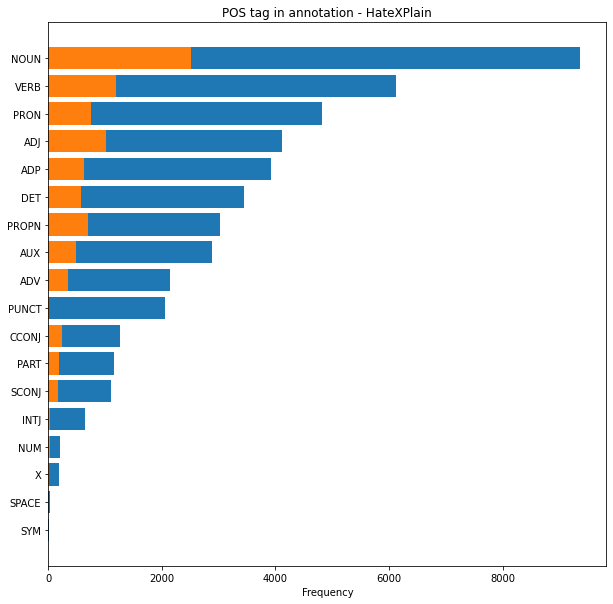

In [99]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

ax.barh(width=cnt_pos_total.values(), y=list(cnt_pos_total.keys()))
ax.barh(width=cnt_pos.values(), y=list(cnt_pos.keys()))

ax.invert_yaxis()

ax.set_xlabel('Frequency')
ax.set_title('POS tag in annotation - HateXPlain')

plt.savefig(path.join(tmp_path, 'posfreq_hatexplain_test'), dpi=600)

In [39]:
from data.hatexplain.dataset import HateXPlain

cnt = dict()

for split in ['test', 'val', 'train']:
    
    # Load dataset
    dataset = HateXPlain(root=dataset_path, split=split)
    tokens = dataset.data['post_tokens']
    rationale = dataset.data['rationale']

    # Add punctuation to separate sentences
    for i in range(len(tokens)):
        tokens[i].append('.')
        rationale[i].append(0)

    flatten_token = [tk for sent in tokens for tk in sent]
    flatten_rationale = [r for sent in rationale for r in sent]

    nlp = spacy.load('en_core_web_sm')
    doc = Doc(nlp.vocab, words=flatten_token)
    pos = [tk.pos_ for tk in nlp(doc)]
    
    # Start counting
    cnt_pos = dict()
    cnt_tok = dict()
    cnt_pos_total = dict()
    cnt_tok_total = dict()
    
    for p, r, t in tqdm(zip(pos, flatten_rationale, flatten_token), total=len(flatten_rationale), desc=split):
    
        cnt_pos_total[p] = cnt_pos_total.get(p, 0) +1
        cnt_tok_total[t] = cnt_tok_total.get(t, 0) +1

        if r > 0:
            cnt_pos[p] = cnt_pos.get(p, 0) + 1
            cnt_tok[t] = cnt_tok.get(t, 0) + 1
            
    cnt[split] = {
        'pos' : cnt_pos,
        'tok' : cnt_tok,
        'pos_total': cnt_pos_total,
        'tok_total': cnt_tok_total
    }    

test:   0%|          | 0/46443 [00:00<?, ?it/s]

val:   0%|          | 0/47014 [00:00<?, ?it/s]

train:   0%|          | 0/376349 [00:00<?, ?it/s]

In [40]:
cnt['test']['pos']

{'ADJ': 1018,
 'PRON': 755,
 'PUNCT': 12,
 'PROPN': 707,
 'SCONJ': 173,
 'ADP': 637,
 'NOUN': 2517,
 'VERB': 1191,
 'DET': 574,
 'AUX': 484,
 'CCONJ': 236,
 'PART': 185,
 'ADV': 340,
 'NUM': 26,
 'INTJ': 36,
 'X': 13,
 'SPACE': 2}

In [41]:
cnt['train']['pos']

{'VERB': 9379,
 'ADJ': 9133,
 'NOUN': 20988,
 'PROPN': 5608,
 'ADV': 2710,
 'AUX': 3994,
 'DET': 4710,
 'SCONJ': 1286,
 'ADP': 5335,
 'PRON': 5635,
 'CCONJ': 1876,
 'NUM': 244,
 'PUNCT': 94,
 'PART': 1543,
 'INTJ': 268,
 'X': 76,
 'SPACE': 13,
 'SYM': 5}

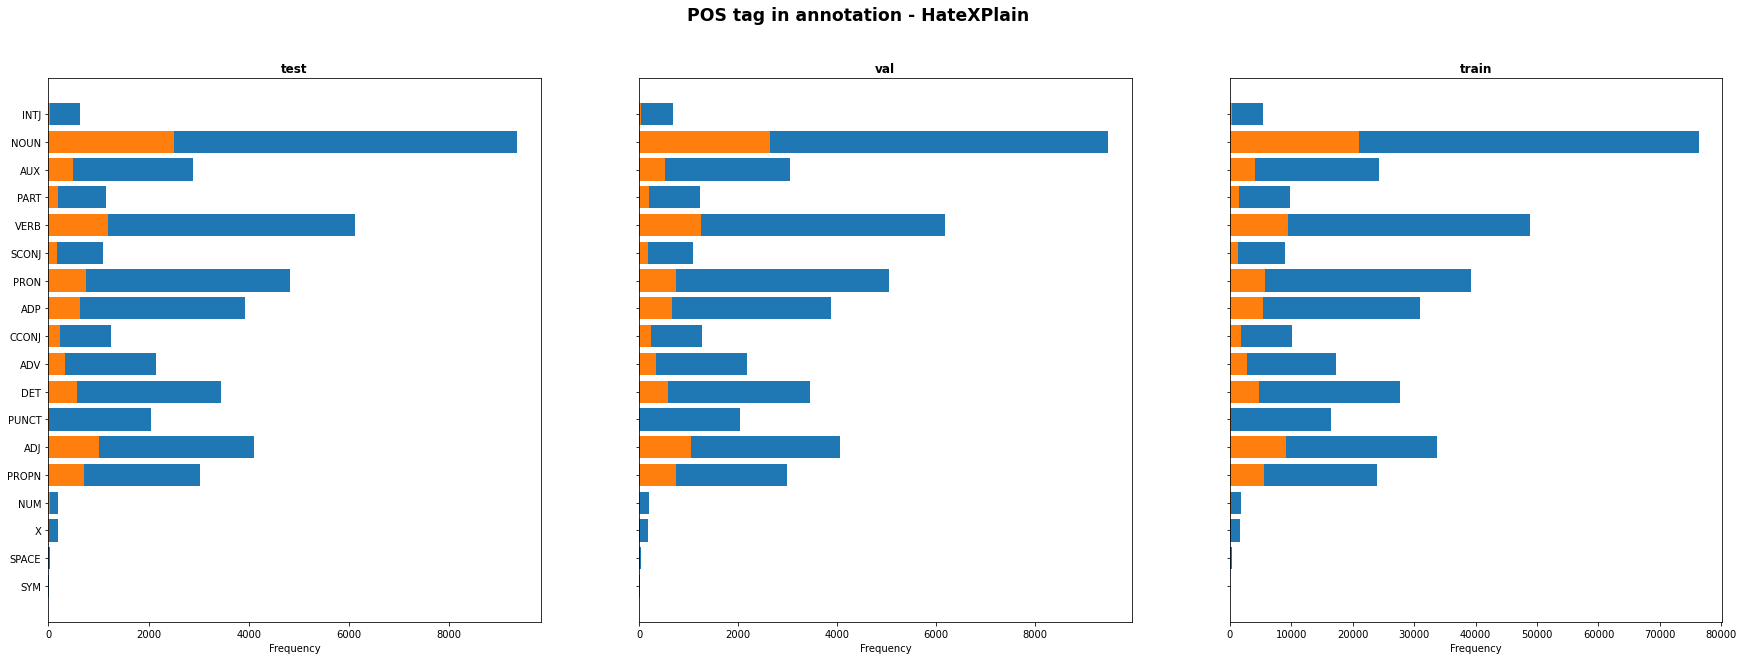

In [103]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,10)

fig, axes = plt.subplots(1, 3, sharey=True)

fig.suptitle('POS tag in annotation - HateXPlain', fontsize='xx-large', fontweight='black')

for ax, pos_freq, split in zip(axes, cnt.values(), cnt.keys()):
    
    cnt_pos_total = pos_freq['pos_total']
    cnt_pos = pos_freq['pos']

    ax.barh(width=cnt_pos_total.values(), y=list(cnt_pos_total.keys()))
    ax.barh(width=cnt_pos.values(), y=list(cnt_pos.keys()))

    ax.invert_yaxis()

    ax.set_xlabel('Frequency')
    ax.set_title(split, fontweight='bold')

plt.savefig(path.join(tmp_path, 'posfreq_hatexplain'), dpi=600)

In [105]:
(cnt_pos['VERB'] + cnt_pos['NOUN'] + cnt_pos['ADJ']) / sum(cnt_pos.values())

0.5418604332139868

#### Check most frequent pos

In [68]:
for split in cnt:
    print('=== Most frequent pos in', split,"===")
    _count = cnt[split]['pos']
    total = sum(_count.values())
    percentage = {k: c/total for k, c in _count.items()}
    sorted_percentage = sorted(percentage.items(), key=lambda item: -item[1])
    sorted_key = [p[0] for p in sorted_percentage]
    sorted_values = [p[1] for p in sorted_percentage]
    cumulated_percentage = {'+'.join(sorted_key[:i]): sum(sorted_values[:i]) for i in range(1, len(sorted_percentage)) }
    cumulated_percentage = {k: v for k, v in cumulated_percentage.items() if v < 0.8}
    display(cumulated_percentage)
    print()

=== Most frequent pos in test ===


{'NOUN': 0.2826184594655289,
 'NOUN+VERB': 0.4163485290815181,
 'NOUN+VERB+ADJ': 0.5306534920278464,
 'NOUN+VERB+ADJ+PRON': 0.6154278014821468,
 'NOUN+VERB+ADJ+PRON+PROPN': 0.6948124859645183,
 'NOUN+VERB+ADJ+PRON+PROPN+ADP': 0.7663373006961599}


=== Most frequent pos in val ===


{'NOUN': 0.2856370322301536,
 'NOUN+VERB': 0.41964092580575385,
 'NOUN+VERB+ADJ': 0.5337443218689163,
 'NOUN+VERB+ADJ+PROPN': 0.6151849448410124,
 'NOUN+VERB+ADJ+PROPN+PRON': 0.6952195544019035,
 'NOUN+VERB+ADJ+PROPN+PRON+ADP': 0.7669262383733506}


=== Most frequent pos in train ===


{'NOUN': 0.28791308284291534,
 'NOUN+VERB': 0.4165740702635225,
 'NOUN+VERB+ADJ': 0.5418604332139869,
 'NOUN+VERB+ADJ+PRON': 0.6191612823572987,
 'NOUN+VERB+ADJ+PRON+PROPN': 0.6960917458880339,
 'NOUN+VERB+ADJ+PRON+PROPN+ADP': 0.7692771993360497}

In [71]:
for split in cnt:
    print('=== Most 10 frequent highlighted tokens in', split,"===")
    _count = cnt[split]['tok']
    total = sum(_count.values())
    percentage = {k: c/total for k, c in _count.items()}
    sorted_percentage = sorted(percentage.items(), key=lambda item: -item[1])
    display(sorted_percentage[:10])
    print()

=== Most 10 frequent highlighted tokens in test ===


[('the', 0.028744666516954863),
 ('and', 0.019986525937570176),
 ('nigger', 0.019425106669660904),
 ('a', 0.018639119694587918),
 ('to', 0.015158320233550416),
 ('of', 0.014484617112059285),
 ('are', 0.013361778576240737),
 ('you', 0.013361778576240737),
 ('kike', 0.011902088479676623),
 ('white', 0.010779249943858073)]


=== Most 10 frequent highlighted tokens in val ===


[('the', 0.02963443651308674),
 ('and', 0.02119835604585767),
 ('to', 0.018061864590093013),
 ('nigger', 0.017412935323383085),
 ('a', 0.016655851178888167),
 ('are', 0.014384598745403418),
 ('white', 0.012329656067488644),
 ('of', 0.012221501189703656),
 ('you', 0.010382868267358857),
 ('in', 0.01027471338957387)]


=== Most 10 frequent highlighted tokens in train ===


[('the', 0.02980918281959477),
 ('nigger', 0.020700440347339397),
 ('and', 0.01982248926567623),
 ('a', 0.018601588542738384),
 ('to', 0.018464408686228513),
 ('of', 0.014349012990932412),
 ('are', 0.01293606046888075),
 ('you', 0.011660287803338958),
 ('kike', 0.0104531050660521),
 ('is', 0.010425669094750126)]

## Making of heuristic

In [5]:
from data.hatexplain.dataset import HateXPlain
import spacy
from spacy.tokens import Doc
from modules.utils import hightlight
import torch

# Load dataset
dataset = HateXPlain(root=dataset_path, split='test')
tokens = dataset.data['post_tokens'].tolist()
rationale = dataset.data['rationale'].tolist()

flatten_token = [tk for sent in tokens for tk in sent]
flatten_rationale = [r for sent in rationale for r in sent]

nlp = spacy.load('en_core_web_sm')

doc = Doc(nlp.vocab, words=flatten_token)
pos = [tk.pos_ for tk in nlp(doc)]

# build mask
pos_filter = [[tk.pos_ in ['ADJ'] for tk in d] for d in tokenized_docs]
stop_filter = [[not tk.is_stop for tk in d] for d in tokenized_docs]
mask = [pos_ and stop_ for pos_, stop_ in zip(pos_filter, stop_filter)]

# Count frequence
token_freq = dict()
flatten_token = [tk for sent in tokens for tk in sent]
flatten_rationale = [r for sent in rationale for r in sent]

for t, r in zip(flatten_token, flatten_rationale):
    if r: token_freq[t] = token_freq.get(t, 0) + 1

total_freq = sum(token_freq.values())
token_freq = {k: v/total_freq for k, v in token_freq.items()}

# Making of heuristic
heuristics = []
for sent_tokens, sent_mask in zip(tokens, mask):
    heuris_map = [token_freq.get(tk, 0) for tk in sent_tokens]
    heuris_map = [h * float(m) for h, m in zip(heuris_map, sent_mask)]
    heuristics.append(heuris_map)

tensor_heuristics = [torch.tensor(h) for h in heuristics]
for i in range(20):
    display(HTML(hightlight(tokens[i], tensor_heuristics[i])))

NameError: name 'tokenized_docs' is not defined

In [ ]:
heuristic = dataset.data['heuristic']
rationale = dataset.data['rationale']

from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(rationale, heuristic)
roc_score

In [ ]:
dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split='val')
dataset.data.head()

In [ ]:
for i in range(10):
    display(HTML(hightlight(dataset.data.loc[i, 'post_tokens'], torch.tensor(dataset.data.loc[i, 'heuristic']))))

In [ ]:
heuristic = dataset.data['heuristic']
rationale = dataset.data['rationale']

heuristic = [h_value for h_vector in heuristic for h_value in h_vector]
rationale = [r_value for r_vector in rationale for r_value in r_vector]

In [ ]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(rationale, heuristic)
roc_score

In [ ]:
for split in ['train', 'val', 'test']:
    dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split=split)
    heuristic = dataset.data['heuristic']
    rationale = dataset.data['rationale']

    heuristic = [h_value for h_vector in heuristic for h_value in h_vector]
    rationale = [r_value for r_vector in rationale for r_value in r_vector]
    roc_score = roc_auc_score(rationale, heuristic)
    print(split, ':', roc_score)

In [ ]:
dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split='test')
heuristic = dataset.data['heuristic']
rationale = dataset.data['rationale']

for i in range(10):
    display(HTML(hightlight(dataset.data.loc[i, 'post_tokens'], torch.tensor(dataset.data.loc[i, 'heuristic']))))
    
roc_score = roc_auc_score(rationale, heuristic)
print('AUROC = ', roc_score)

In [8]:
dataset.data

,post_tokens,label,rationale,heuristic
0,"[u, really, think, i, would, not, have, been, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...","[0.0007682071964552725, 0.0, 0.000905387052965..."
1,"[the, uk, has, threatened, to, return, radioac...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.00032923165562368824, 0.0, 1.371798565..."
2,"[if, english, is, not, imposition, then, hindi...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]","[0.0, 0.0001508978421608571, 0.0, 0.0, 1.37179..."
3,"[no, liberal, congratulated, hindu, refugees, ...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[0.0, 0.0005624374116904674, 0.0, 9.6025899556..."
4,"[he, said, bro, even, your, texts, sound, redn...",offensive,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0004252575551805973, 1.371798565098701..."
...,...,...,...,...
15378,"[thanks, for, coming, to, my, ted, talk, p.s.,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[5.487194260394804e-05, 0.0, 0.000205769784764..."
15379,"[<user>, <user>, iran, has, the, 2, n, biggest...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0004938474834355323, 0.0004938474834355323,..."
15380,"[or, maybe, those, were, not, meant, to, be, h...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0003703856125766492, 0.0, 0.0, 0.0, 5...."
15381,"[good, morning, ados, black, women, only]",normal,"[0, 0, 0, 0, 0, 0]","[0.0009191050386161296, 4.115395695296103e-05,..."


In [13]:
heuristic.isnan()

AttributeError: 'numpy.ndarray' object has no attribute 'isnan'

In [3]:
from sklearn.metrics import average_precision_score
import numpy as np
from data.hatexplain.dataset import HateXPlain

for split in ['train', 'val', 'test']:
    dataset = HateXPlain(root=path.join(cache_path, 'dataset'), split=split)
    dataset.data = dataset.data[dataset.data['label'] != 'normal'].reset_index()
    
    h_vectors = [np.array(h_vector)/sum(h_vector) for h_vector in dataset.data['heuristic']]
    h_vectors = [(h-h.min())/(h.max()-h.min() + (h.max()==h.min())) for h in h_vectors]
    heuristic = np.concatenate(h_vectors)
    
    rationale = np.array([r_value for r_vector in dataset.data['rationale'] for r_value in r_vector])
    auprc = average_precision_score(rationale, heuristic)
    
    print(split, ':', auprc)

train : 0.5044194852915073
val : 0.5280741352217981
test : 0.522427389102623


## Check Dataset

In [7]:
from data_module.hatexplain_module import HateXPlainDM
from data.hatexplain.dataset import HateXPlain

In [8]:
hatexplain = HateXPlain(root=dataset_path, split='test')

In [9]:
hatexplain.data

,annotators.annotator_id,post_tokens,label,rationale,heuristic
0,"[9, 17, 64]","[<user>, men, can, not, be, raped, can, not, b...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[200, 199, 211]","[<user>, you, are, missing, an, essential, pre...",normal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[233, 215, 202]","[<user>, <user>, why, are, you, repeating, you...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[206, 199, 203]","[<user>, <user>, well, she, ’, muslim, so, of,...",hatespeech,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[205, 223, 208]","[<user>, lol, not, me, i, don, ’, t, deal, wit...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
1919,"[225, 207, 204]","[we, hate, islam, and, we, will, mock, your, p...",hatespeech,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.858..."
1920,"[13, 4, 46]","[he, sounds, like, a, clothing, line, i, will,...",offensive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1921,"[203, 209, 223]","[4, chan, is, retarded, and, so, are, you]",offensive,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.008463997146658984, 0.0, 0.0..."
1922,"[9, 6, 110]","[plenty, of, e, celebs, have, covered, israid,...",hatespeech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
